In [4]:


import numpy as np
from skimage import measure
from skimage.segmentation import find_boundaries
from skimage.morphology import opening,closing
from skimage.io import imread
from matplotlib import pyplot as plt
import os
from os import listdir
import pandas as pd
from scipy.stats import kde
import seaborn as sns
import copy
from math import exp,log
import pickle
import scipy.ndimage as ndimage
import scipy.interpolate.fitpack as fitpack
from sklearn import manifold,decomposition,random_projection,cluster,metrics,preprocessing,mixture,model_selection
from sklearn.neighbors import kneighbors_graph,BallTree
# from pymc import MCMC,flib,Model,MAP
# from ripser import Rips,ripser,plot_dgms
import scipy.io as sio
# import kmapper as km
# from kmapper import jupyter
from mpl_toolkits.mplot3d import Axes3D
from cell_class import single_cell,fluor_single_cell
import contour_class
import utility_tools
import image_warp
from contour_tool import df_find_contour_points,find_contour_points,generate_contours,align_contour_to,align_contours
from scipy.signal import medfilt,wiener

# import bnpy
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,QuantileTransformer
from itertools import product
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import glob
# from pykalman import KalmanFilter
# from neupy import algorithms, utils
from tslearn.utils import to_time_series,to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans,KShape,GlobalAlignmentKernelKMeans,silhouette_score
from tslearn.metrics import dtw_path,dtw_subsequence_path,cdist_gak,cdist_dtw
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter
from sklearn.manifold import MDS
# import sparse
from statsmodels.tsa.stattools import grangercausalitytests
from scipy import signal,stats
from statsmodels import robust
from matplotlib.patches import Circle, Wedge, Rectangle
from traj_scale import sp_traj_scaling,ssp_traj_scaling

ModuleNotFoundError: No module named 'tslearn'

In [1]:
import sys
sys.path.insert(1, '/home/thomas/research/projects/a549_40x/scripts/memes/')

import warnings
warnings.filterwarnings("ignore")

import glob
import pickle
from traj_class import single_cell_traj,fluor_single_cell_traj
import matplotlib.pyplot as plt
import numpy as np

In [2]:


main_path='/home/thomas/research/projects/a549_40x/data/'
output_path=main_path+'out/pcna/01-13-22_72hr_no-treat/'
sct_path=output_path+'traj/sct-mit_init-02/'
result_path=output_path+'result/'
sct_list=sorted(glob.glob(sct_path+'*sub*'))
print(len(sct_list))

108


In [3]:
all_traj_zero_init_time = []
all_traj_pcna_int_range = []
for sct_idx in range(len(sct_list)):
        sct_path = sct_list[sct_idx]
        with open (sct_path, 'rb') as fp:
                sct = pickle.load(fp)
        sct_zero_init_time = sct.traj_seri[:,0]-np.min(sct.traj_seri[:,0])   # decreases initial time to 0
        sct_int_range = sct.traj_pcna_feature_values[2]
        all_traj_zero_init_time.append(sct_zero_init_time)
        all_traj_pcna_int_range.append(sct_int_range)

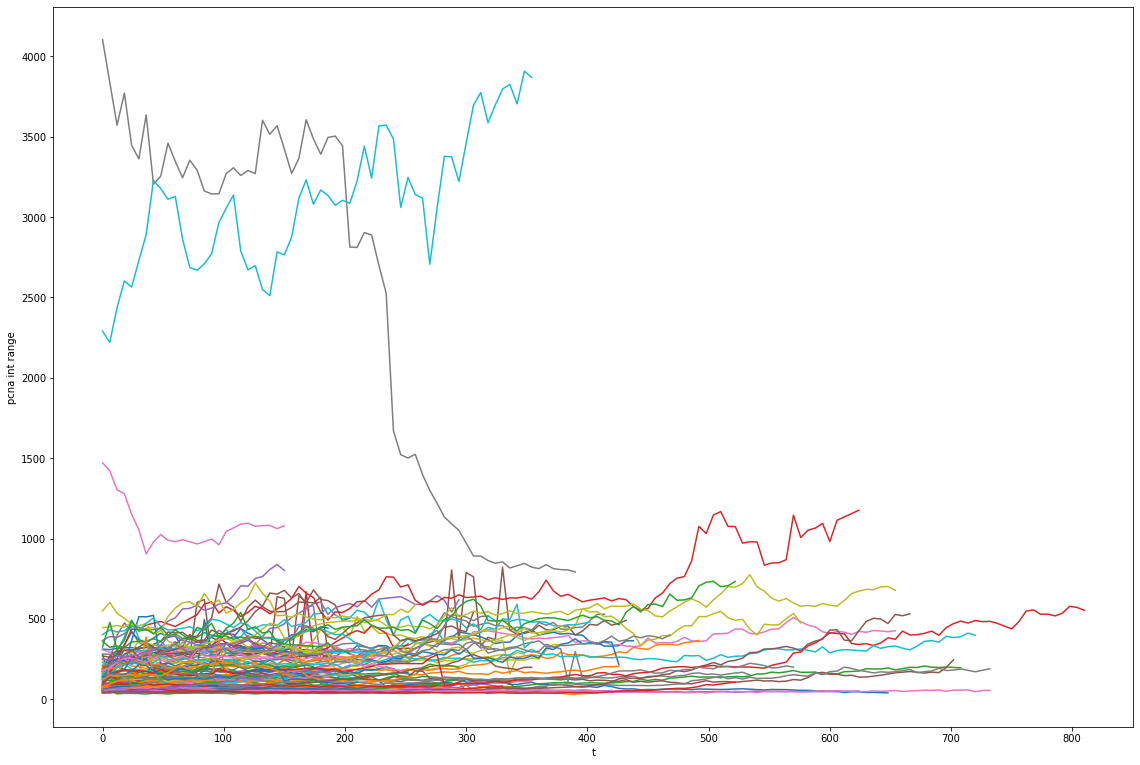

In [12]:
### regular line plot ###
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
for sct_idx in range(len(sct_list)):
    ax.plot(all_traj_zero_init_time[sct_idx],all_traj_pcna_int_range[sct_idx])
ax.set_ylabel('pcna int range')
ax.set_xlabel('t')
plt.savefig('filename.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [10]:
sct.traj_seri[:,0]

array([397., 403., 409., 415., 421., 427., 433., 439., 445., 451., 457.,
       469., 475., 481., 487., 493., 499., 505., 511., 517., 523., 529.,
       535., 541., 547., 553., 559., 565., 571., 577., 583., 589., 595.,
       601., 607., 613., 619., 625., 631., 637., 643., 649., 655., 661.,
       667., 673., 679., 685., 691., 697., 703., 709., 715., 721., 727.,
       733., 739., 745., 751., 757., 763., 769., 775., 781., 787., 793.,
       799., 805., 811., 817., 823., 829., 835., 841., 847., 853., 859.,
       865.])